# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most important functions of the beautiful scikit-learn library.

What are we going to cover:
    
0. An end-to-end scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/model/algorithm for our problems
3. Fit the model/algorithm/estimator and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd

In [2]:
import numpy as np

In [3]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Seperate the features and the target variables from the dataset
# Create a feature matrix (X)
X = heart_disease.drop("target",axis=1)

# Create a label matrix (y)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters we can see those hyperparameters 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train,y_train);

In [8]:
# Make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [9]:
y_test

154    1
130    1
301    0
138    1
294    0
      ..
123    1
253    0
48     1
102    1
171    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate our model on the training set and the test set
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.8360655737704918

In [12]:
# Evaulating further with the help of some other evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [14]:
confusion_matrix(y_test,y_preds)

array([[23,  5],
       [ 5, 28]])

In [15]:
accuracy_score(y_test,y_preds)

0.8360655737704918

In [16]:
# 5. Improve the model 
# (Usually we try by changing some hyperparameters, here we will experiment by tunning the n_estimators hyperparameter)
np.random.seed(42)
for i in range(10,110,10):
    print(f"Fitting the model with the number of estimators = {i}")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_preds = clf.predict(X_test)
    print(f"Accuracy score for the model with {i} estimators = {accuracy_score(y_test,y_preds) * 100:.2f}%")
    print("")

Fitting the model with the number of estimators = 10
Accuracy score for the model with 10 estimators = 85.25%

Fitting the model with the number of estimators = 20
Accuracy score for the model with 20 estimators = 86.89%

Fitting the model with the number of estimators = 30
Accuracy score for the model with 30 estimators = 88.52%

Fitting the model with the number of estimators = 40
Accuracy score for the model with 40 estimators = 88.52%

Fitting the model with the number of estimators = 50
Accuracy score for the model with 50 estimators = 86.89%

Fitting the model with the number of estimators = 60
Accuracy score for the model with 60 estimators = 88.52%

Fitting the model with the number of estimators = 70
Accuracy score for the model with 70 estimators = 88.52%

Fitting the model with the number of estimators = 80
Accuracy score for the model with 80 estimators = 85.25%

Fitting the model with the number of estimators = 90
Accuracy score for the model with 90 estimators = 86.89%

F

In [17]:
# 6. Save a model and load it.
# Here the last model state where n_estimators value is 100 will be saved.
import pickle

pickle.dump(clf, open("../random_forest_model_classifier_1.pkl", "wb"))

In [18]:
# Load the saved model
loaded_model = pickle.load(open("../random_forest_model_classifier_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8852459016393442

# Now we will explore each step one by one in depth 

Let's begin ....

## 1. Getting our data ready to be used with machine learning

Three main things we need to do:
1. Split the data into features and labels (Usually `X` and `y`).
2. Filling (also called Imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also called feature encoding).

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape[0] * 0.2 # Number of rows in the test set

60.6

## 1.1 Make sure the data is numerical.

We will try to make the data numerical where the data is not in some numerical form.

In [25]:
car_sales = pd.read_csv("../scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
# Split the data into X,y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [28]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Build Machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

In [38]:
# Doors though has numerical value it is a categorical variable as it divided cars into different categories based on number of doors.
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [39]:
# We will get an error like above if the data is non-numerical as our model won't be able to make sense of it.
# Here we have the categorical variables Make (Honda,BMW) and Color (White,Blue,etc), Doors is also a categotrical feature.

# Hence we will turn the categories into numbers using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
# Another way to encode pandas dataframe is using Pandas dumies. 
dummies = pd.get_dummies(X, columns = ["Make","Colour","Doors"])
dummies

,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,0,0,0,1,1,0,0,0,0,0,1,0
996,155144,0,0,1,0,0,0,0,0,1,1,0,0
997,66604,0,0,1,0,0,1,0,0,0,0,1,0
998,215883,0,1,0,0,0,0,0,0,1,0,1,0


In [43]:
# Let's refit the model as all our data is in numbers.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train,y_train);

In [44]:
model.score(X_train,y_train)

0.891612713353635

In [45]:
model.score(X_test,y_test)

0.3235867221569877

## What if we had missing values?

1. Fill out the missing values (also known as imputing).
2. Remove the missing data altogether.

In [46]:
car_sales_missing = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
car_sales_missing.info(), car_sales_missing.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


(None, 1000)

In [48]:
# It will give the number of missing values in all columns
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Let's split the data into X and y.
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [50]:
# If we try to apply the OneHotEncoder it will throw an error as we have missing values in our dataset.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Let's fill the missing Data.

### Option 1: Fill the missing data with Pandas

* Generally we fill the missing values of a column with strings by replacing NaN with "missing" or some appropriate string.
* We can fill the missing values of numerical column with something like the mean of all values in that column.

In [51]:
int(car_sales_missing["Doors"].median())

4

In [52]:
# Fill the "Make" column.
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the "Colour" column.
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM) column".
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column.
car_sales_missing["Doors"].fillna(int(car_sales_missing["Doors"].median()), inplace=True)

In [53]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [54]:
# Price column is the Target/Label column. Hence we need to remove the rows where there are missing Prices. Rather than Imputing with some data.
# We will lose some data by doing this but it is okay.
car_sales_missing.dropna(inplace=True)

In [55]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [56]:
car_sales_missing.shape # This shows that we lost 50 rows which had missing Price values

(950, 5)

In [57]:
# Let's try to apply OneHotEncoder now.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [58]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [59]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 2 : Filling out the missing data with scikit-learn

In [60]:
car_sales_missing = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [64]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer  # To fill missing values
from sklearn.compose import ColumnTransformer # To use the required transformation to a list of Columns

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [65]:
# Let's check if there are any missing values left
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [66]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [67]:
# Now let's turn the data into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_car_sales_filled = transformer.fit_transform(car_sales_filled)
transformed_car_sales_filled

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [68]:
pd.DataFrame(transformed_car_sales_filled.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [69]:
# Now we have got the data so let's try to fit our model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_car_sales_filled, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_train, y_train)

0.8845872827949007

In [70]:
model.score(X_test, y_test)

0.21990196728583944

# 2. Choosing the right estimator/algorithm for our problem.

Scikit-learn uses estimator as another term for machine learning estimator or model.

* Classification - predicting whether a particular thing is one thing or another.
* Regression - predicting a number.
* Clustering - predicting which category a particular thing belongs to when the categories are not known.

Step - 1 : Check the scikit learn machine learning map....
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking Machine learning model for a Regression problem.

In [71]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
# boston

In [72]:
boston_df = pd.DataFrame(boston["data"], columns=boston.feature_names)
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
# How many samples are there?
len(boston_df)

506

In [74]:
# Let's try the Ridge Regression Model.
from sklearn.linear_model import Ridge

# Setup a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
regressor = Ridge(alpha=0.5)
regressor.fit(X_train, y_train)

# Check the score of the ridge model on test data
regressor.score(X_test, y_test)

0.6675800871276227

In [75]:
regressor.score(X_train, y_train)

0.7500178709433354

In [76]:
# let's try the support vector regression model on the data that we have
from sklearn.svm import SVR
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_regressor.score(X_test, y_test)

0.27948125010200286

##### How do we improve the score ?

Here the support vector regressor is clearly not working as we want.

Let's refer back to the map .... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

<img alt="scikit-learn-ml-map" />

In [77]:
# Let's try ensemble regressors particularly the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
ensemble_model = RandomForestRegressor()

# Train the model on the training set
ensemble_model.fit(X_train, y_train)

# Check the model's performance on the test set
ensemble_model.score(X_test, y_test)

0.8654448653350507

In [78]:
ensemble_model.score(X_train,y_train)

0.9763520974033731

### 2.2 Choosing an estimator for classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [79]:
heart_disease = pd.read_csv("../scikit-learn-data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [80]:
# How many samples ?
len(heart_disease)

303

Consulting our map and it tells us to use `LinearSVC`

In [81]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intantiate the LinearSVC
linsvc_clf = LinearSVC()

# Train the model on the training set.
linsvc_clf.fit(X_train, y_train)

# Evaluate the model on test set.
linsvc_clf.score(X_test, y_test)

/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [82]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [83]:
# Let's use ensemble estimator
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=20000)

# Train the model on the training set.
rfc_model.fit(X_train, y_train)

# Evaluate the model on test set.
rfc_model.score(X_test, y_test)

0.8688524590163934

#### Tidbit :

1. If you have structured data, use ensemble methods.
2. If you have unstructured data, use deep learning or transfer learning.

# 3. Fit the model/algorithm/estimator on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different name for :
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [84]:
# Let's use ensemble estimator
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=100)

# Fit the model on the training set. ------ Here we fit the model so that it can learn patterns from the data provided.
rfc_model.fit(X_train, y_train)

# Evaluate the model on test set. (use the patterns that the machine has learnt)
rfc_model.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a Machine Learning model

2 main ways to make predictions
1. `predict()`
2. `predict_proba()`

In [85]:
# Use a trained model to make predictions
rfc_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [86]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [87]:
# Compare predictions to truth labels to evauluate the model
y_preds = rfc_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [88]:
np.mean(y_preds == y_test)

0.8524590163934426

In [89]:
rfc_model.score(X_test, y_test)

0.8524590163934426

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [91]:
# predict_proba() returns probabilities of a classification label
rfc_model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

`predit()` can also be used with regression models.

In [93]:
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Get the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X_train,y_train)

# Evaluate the model
rfr_model.score(X_test,y_test)

0.8654448653350507

In [94]:
rfr_model.predict(X_test[:5])

array([23.081, 30.574, 16.759, 23.46 , 16.893])

In [95]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: target, dtype: float64

In [96]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred=rfr_model.predict(X_test))

2.136382352941176

In [97]:
# mean_absolute_error()  

# 4. Evaluating a ML model

Three ways to evaluate Scikit-learn models/estimators :
1. Estimator `score` method.
2. The `scoring` paramter.
3. Problem specific metric functions.

###  4.1 Evaluating the model with score method

In [98]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train);

In [99]:
rfc.score(X_test, y_test)

0.8524590163934426

💡 Note: Every estimator score model has it's own default metrics that it uses for the evaulation.

### 4.2 Evaluating a model using on `scoring` paramter.

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Get the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
rfc_model = RandomForestClassifier(n_estimators=100)

# Fit the model on the training set. ------ Here we fit the model so that it can learn patterns from the data provided.
rfc_model.fit(X_train, y_train);

In [101]:
rfc_model.score(X_test, y_test)

0.8524590163934426

In [102]:
cross_val_score(rfc_model, X, y, cv=5) # k-fold cv, here we took k=5 but we can take whatever we want

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

A brief overview of what cross validation does :

<img src="../images/cross_val.png" />

In [103]:
np.random.seed(42)

# Single training and test split score
rfc_single_score = rfc_model.score(X_test, y_test)

# Take the mean of 10-fold cross-validation score
rfc_cross_val_score = np.mean(cross_val_score(rfc_model, X, y))

# Compare the scores
rfc_single_score, rfc_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [104]:
# Default scoring parameter of classifier = mean accuracy
# rfc_model.score() # returns mean accuracy

In [105]:
# Scoring parameter set to NONE by default, ie. if it is NONE it will use default scoring parameter for the estimator
cross_val_score(rfc_model, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

Four main covered here are :
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

rfc_model = RandomForestClassifier()
cross_val_score = cross_val_score(rfc_model, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [107]:
np.mean(cross_val_score)

0.8248087431693989

In [108]:
print(f"Heart disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100:.2f}%")

Heart disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [109]:
from sklearn.metrics import roc_curve

# Fit the classifier 
rfc_model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = rfc_model.predict_proba(X_test)
y_probs[:5], len(y_probs)

(array([[0.87, 0.13],
        [0.41, 0.59],
        [0.45, 0.55],
        [0.89, 0.11],
        [0.19, 0.81]]),
 61)

In [110]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.13, 0.59, 0.55, 0.11, 0.81])

In [111]:
# Calculate tpr, fpr and thresholds
fpr, tpr,thresholds = roc_curve(y_test, y_probs_positive)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
        0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
        0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
        0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
        1.        ]),
 array([0.     , 0.0625 , 0.1875 , 0.25   , 0.34375, 0.375  , 0.4375 ,
        0.4375 , 0.53125, 0.59375, 0.6875 , 0.71875, 0.75   , 0.75   ,
        0.8125 , 0.875  , 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 0.96875, 0.96875, 1.     , 1.     , 1.     ,
        1.     , 1.     , 1.     ]),
 array([2.  , 1.  , 0.91, 0.87, 0.86, 0.83, 0.81, 0.8 , 0.77, 0.7 , 0.69,
        0.64, 0.6 , 0.59, 0.55, 0.51, 0.36, 0.35, 0.29, 0.19, 0.17, 0.16,
        0.14, 0.12, 0.11, 0.1 , 0.07, 0.05, 0.04, 0.03, 0.  ]))

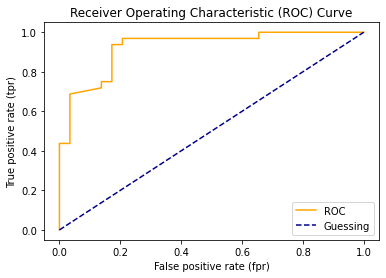

In [112]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots are ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [113]:
# Let's check the AUC 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

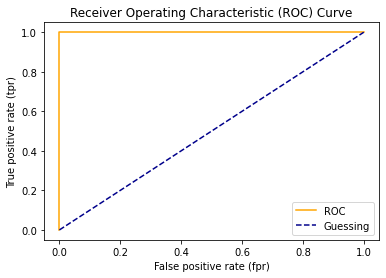

In [114]:
# The perfect model would have area under curve value = 1. 
# Let's demonstrate an example
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [115]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

The confusion matrix is used to compare the labels a model predicts with the actual labels a model is supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [116]:
from sklearn.metrics import confusion_matrix

y_preds = rfc_model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [117]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [118]:
# Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, 
            rownames=["Actual Labels"], 
            colnames=["Predicted Labels"]
           )

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


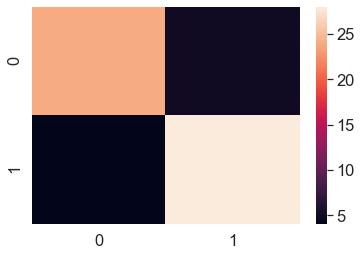

In [119]:
# Make our confusion matrix more visual using Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

As we can see the above confusion matrix has very little communication value. Let's address this by adding some information.

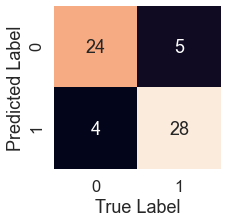

In [120]:
def plot_conf_mat(conf_mat):
    """
    Plot confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, 
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar = False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
    
plot_conf_mat(conf_mat)    

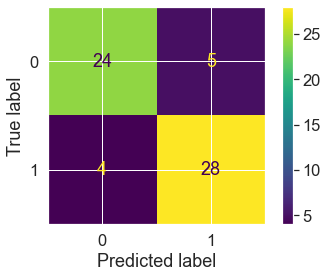

In [121]:
# Using scikit learn's plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc_model, X_test, y_test);

**Classification Report**

Also, a collection of different evaluation metrics report.

### Anatomy of Classification Report

<img src="../images/Anatomy-of-Classification-Report.png"/>

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [123]:
# When precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True, zero_division='warn'))

/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yash/Desktop/DeepLearningSpecialization/DBML/dbourke-pandas/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarise classification metrics :

* **Accuracy** is a good measure to start with if all the classes are balanced (e.g. same amount of samples which are labeled with 0 or 1).
* **Precision** and **Recall** become more important when classes are imbalanced.
* If false positives prediction are worse than false negatives, aim higher **precision**.
* If false negatives predictions are worse than false positives, aim for higher **recall**.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics e
Model evaluation metrics documentation -
https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or co-efficient of determination.
2. Mean absolute error (MAE).
3. Mean squared error (MSE).

**R^2**

What R-sqaured does : Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts the range of numbers it's R^2 value would be 1.

In [124]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr_model = RandomForestRegressor()

rfr_model.fit(X_train, y_train);

In [125]:
rfr_model.score(X_test, y_test)

0.8654448653350507

In [126]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean.
y_test_mean = np.full(len(y_test), y_test.mean())

y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [127]:
# Model only predicting the mean gets an R^2 value of 0.
r2_score(y_test, y_test_mean)

0.0

In [128]:
# Model predicting perfect values gets an R^2 value of 1.
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [129]:
from sklearn.metrics import mean_absolute_error

y_preds = rfr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [130]:
df = pd.DataFrame({"Actual Values": y_test,
                  "Predicted Values": y_preds})
df["differences"] = df["Actual Values"] - df["Predicted Values"]
df

,Actual Values,Predicted Values,differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,-2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


In [131]:
exp = df["differences"].abs()

In [132]:
exp.mean()

2.136382352941176

**Mean sqaured error (MSE)**

In [133]:
from sklearn.metrics import mean_squared_error

y_preds = rfr_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [134]:
exp.pow(2).mean()

9.867437068627442

### 4.2.3 Finally using the `scoring` parameter.

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [138]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [139]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is : 82.48%


In [142]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # By default parameter scoring = accuracy 
np.mean(cv_acc)

0.8248087431693989

In [143]:
# Precision 
cv_precision = cross_val_score(clf, X, y, scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [145]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')
np.mean(cv_recall)

0.8484848484848484

In [146]:
# F1-score
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
np.mean(cv_f1)

0.8455032904593217

How about regression model?

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

reg = RandomForestRegressor()

In [148]:
np.random.seed(42)
cv_r2 = cross_val_score(reg, X, y, cv=5, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [149]:
np.random.seed(42)
cv_r2 = cross_val_score(reg, X, y, cv=5, scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [153]:
# Mean absolute error (MAE)
cv2_mae = cross_val_score(reg, X, y, scoring='neg_mean_absolute_error')
cv2_mae

array([-2.07295098, -2.54170297, -3.35348515, -3.79706931, -3.23655446])

In [154]:
# Mean Squared Error (MSE)
cv_mse = cross_val_score(reg, X, y, scoring='neg_mean_squared_error')
cv_mse

array([ -7.61639683, -13.39745507, -22.08663681, -47.10961291,
       -18.43564759])

### 4.3 Using different evaluation metrics as Scikit-Learn functions.

**Classification evaluation functions**

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions 
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classification metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)*100:.2f}")
print(f"Recall : {recall_score(y_test, y_preds)*100:.2f}")
print(f"F1 score : {f1_score(y_test, y_preds)*100:.2f}")

Classification metrics on the test set
Accuracy : 85.25%
Precision : 84.85
Recall : 87.50
F1 score : 86.15


**Regression evaluation functions**

In [167]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ref = RandomForestRegressor()
ref.fit(X_train, y_train)

# Make predictions 
y_preds = ref.predict(X_test)

# Evaluate the regressor
print("Regression metrics on the test set")
print(f"R^2 Score : {r2_score(y_test, y_preds):.2f}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_preds):.2f}")
print(f"Mean Sqaured Error : {mean_squared_error(y_test, y_preds):.2f}")

Regression metrics on the test set
R^2 Score : 0.87
Mean Absolute Error : 2.14
Mean Sqaured Error : 9.87


# 5. Improving a Machine Learning model. 

* First predictions = baseline predictions
* First model = baseline model

The ways by which we can improve the model,

**1. From data perspective:**
* Could we collect more data? (generally, the more the data, the better)
* Could we improve our data?

**2. From a model perspective:**
* Is there a better model we could use?
* Could we improve the current model? 

**Parameters v/s Hyperparameters**
* Parameters = models finds these patterns in data.
* Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability to detect patterns.

**Three ways to adjust hyperparameters :**
1. By hand
2. Randomly with RandomizedSearchCV
3. Exhaustively with GridSearchCV

In [168]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# What hyperparameters are there that we can tune?
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Usually we use a validation set whenever we want to tune the parameters and after that we test the model on the test set which we tunned on the validation set.

<img src="../images/hyperparamter-tuning-scenario.png" />

The concept of validation set is analogous to the diagram below

<img src="../images/concept-train-test-val.png" />

**So, let's make three sets :**
1. Training
2. Validation
3. Test

In [169]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust :
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [193]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparisons on y_true v/s y_preds on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy" : round(accuracy,2),
                  "precision" : round(precision,2),
                  "recall" : round(recall, 2),
                  "f1 score" : round(f1, 2)}
    
    print(f"Accuracy : {accuracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return metric_dict

In [172]:
# Let's split the dataset into 3 sets (train, val, test) manually using pandas shuffle.
# Come up with the baseline model which train on the train set and evaluate on validation set.
# We will try to get better performance on the baseline model by adjusting the hyperparameters and evaluating on the validation set.

from sklearn.ensemble import RandomForestClassifier

# We set this in order to get reproducible results 
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split data into features and labels ie. X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets.
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Instantiate the model
clf = RandomForestClassifier()

# Fit the model on the training set.
clf.fit(X_train, y_train)

# Make baseline predictions on the validation set
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy : 82.22
Precision : 0.81
Recall : 0.88
F1 Score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1 score': 0.85}

In [188]:
np.random.seed(42)

# Create a second classifier with different hyperparamters
clf_2 = RandomForestClassifier(n_estimators=10000, max_depth=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparamters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy : 82.22
Precision : 0.81
Recall : 0.88
F1 Score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1 score': 0.85}

### Tuning Hyperparameters randomly with RandomizedSearchCV 

RandomizedSearchCV aka Randomized Search Cross Validation tries to adjust the hyperparamters randomly so that the model can (potentially) make better predictions.

In [197]:
from sklearn.model_selection import RandomizedSearchCV

# Let's create a dictionary of hyperparamters we would like to adjust as the keys and the values we would like to try out.
grid = {"n_estimators" : [10,100,200,500,1000,1200],
                 "max_depth" : [None,5,10,20,30],
                 "max_features" : ["auto", "sqrt"],
                 "min_samples_split" : [2,4,6],
                 "min_samples_leaf" : [1,2,4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Random Forest Classifier, n_jobs set how many of your computer processors you want to dedicate to this model. "-1" means all
clf = RandomForestClassifier(n_jobs=-1)

# Set Up RandomizedSearchCV. NOTE : focus on CV which stands for Cross Validation ie. it will automatically make the validation set for us.
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                           n_iter=10, # no. of models to try (tries 10 random selection of hyperparameter values from rndm_search_cv)
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [198]:
# In order to get which hyperparameters selection yield us best results
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [199]:
# Make predictions with the best hyperparameters
rs_y_preds =rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1 score': 0.81}

### 5.3 Tuning Hyperparameter with GridSearchCV 

In [200]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

**Difference between RandomizedSearchCV and GridSearchCV.**


Unlike RandomizedSearchCV in which if we try with n_iter = 10, it selects 10 random hyperparameter settings from the grid. If we use GridSearchCV it will try out every possible combination of hyperparameter settings provided in the grid. 

In [201]:
# Let's get influenced with the best hyperparameter settings we obtained from RandomizedSearchCV
# Based on those values we will get rid of some values and then apply GridSearchCV
grid_2 = {"n_estimators" : [100, 200, 500],
          "max_depth" : [None],
          "max_features" : ["auto", "sqrt"],
          "min_samples_split" : [6],
          "min_samples_leaf" : [1,2]}

In [202]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the Random Forest Classifier, n_jobs set how many of your computer processors you want to dedicate to this model. "-1" means all
clf = RandomForestClassifier(n_jobs=-1)

# Set up GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

# Fit the GridSearchCV version of classifier
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [203]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [204]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Accuracy : 78.69%
Precision : 0.74
Recall : 0.82
F1 Score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1 score': 0.78}

#### Let's compare our different model metrics.

Here we are not comparing the baseline model because it was trained on different training set and also evaluated on different set of samples compared to the `rs_clf` and `gs_clf` model.

In general we should only compare different models trained on same data and evaluated on same data.

In [205]:
compare_metrics = pd.DataFrame({"random search" : rs_metrics,
                               "grid search" : gs_metrics})
compare_metrics

,random search,grid search
accuracy,0.82,0.79
precision,0.77,0.74
recall,0.86,0.82
f1 score,0.81,0.78


In [206]:
# As the baseline and clf_2 are trained on same data and evaluated on same data as well we can compare them.
compare_metrics_2 = pd.DataFrame({"baseline" : baseline_metrics,
                               "clf 2" : clf_2_metrics})
compare_metrics_2

,baseline,clf 2
accuracy,0.82,0.82
precision,0.81,0.81
recall,0.88,0.88
f1 score,0.85,0.85


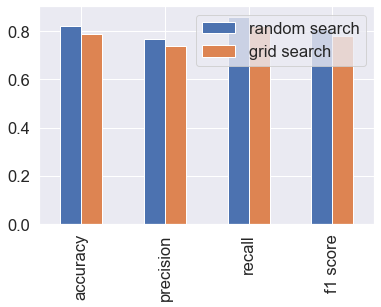

In [322]:
compare_metrics.plot.bar();

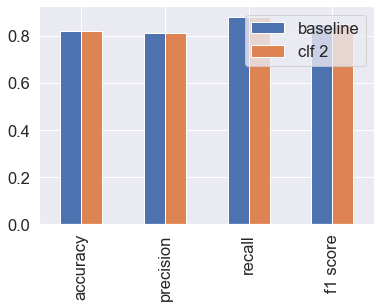

In [323]:
compare_metrics_2.plot.bar();

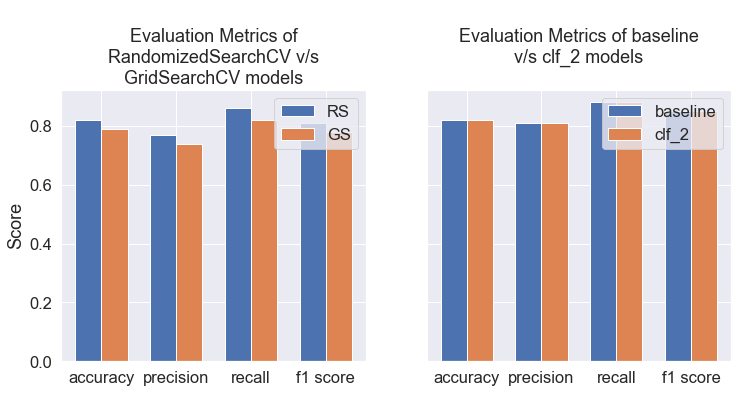

In [324]:
labels = rs_metrics.keys()
x = np.arange(len(labels))
width = 0.35

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5), sharey=True)

a = ax1.bar(x - width/2, rs_metrics.values(), width, label='RS')
b = ax1.bar(x + width/2, gs_metrics.values(), width, label='GS')
c = ax2.bar(x - width/2, baseline_metrics.values(), width, label='baseline')
d = ax2.bar(x + width/2, clf_2_metrics.values(), width, label='clf_2')

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_title('''Evaluation Metrics of
RandomizedSearchCV v/s
GridSearchCV models''')
ax1.set_ylabel('Score')
ax1.legend()

ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_title('''
Evaluation Metrics of baseline
v/s clf_2 models
''')
ax2.legend()
plt.show()

**Let's just try to compare all the models just for fun.**

In [329]:
compare_metrics_3 = pd.DataFrame()

In [331]:
compare_metrics_3['baseline'] = compare_metrics_2['baseline']
compare_metrics_3['clf 2'] = compare_metrics_2['clf 2']
compare_metrics_3['rs'] = compare_metrics['random search']
compare_metrics_3['gs'] = compare_metrics['grid search']

In [332]:
compare_metrics_3

,baseline,clf 2,rs,gs
accuracy,0.82,0.82,0.82,0.79
precision,0.81,0.81,0.77,0.74
recall,0.88,0.88,0.86,0.82
f1 score,0.85,0.85,0.81,0.78


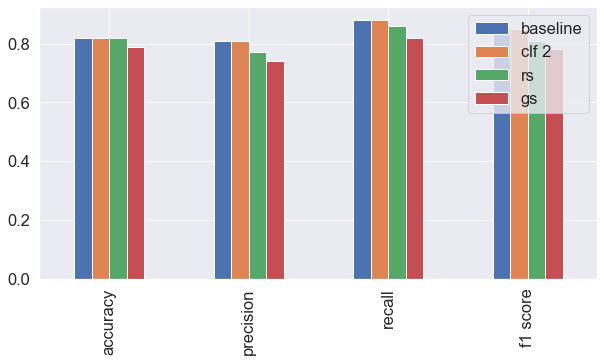

In [335]:
compare_metrics_3.plot.bar(figsize=(10,5));

# 6. Saving and loading a Machine learning model.

Two ways to save and load a Machine learning model.
1. With python's `Pickle` module.
2. With the `joblib` module.

### 6.1 Using `Pickle` module.

In [341]:
import pickle

# Save an existing model to a file.
pickle.dump(gs_clf, open("../trained-models/grid_search_random_forest_classifier.pkl", "wb"))

In [342]:
# Load a saved model
loaded_pickle_model = pickle.load(open("../trained-models/grid_search_random_forest_classifier.pkl", "rb"))

In [343]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy : 78.69%
Precision : 0.74
Recall : 0.82
F1 Score : 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1 score': 0.78}

### 6.2 Using `joblib` module.

In [344]:
from joblib import dump, load

# Save a model to a file
dump(rs_clf, filename="../trained-models/random_search_random_forst_classifier.joblib")

['../trained-models/random_search_random_forst_classifier.joblib']

In [345]:
# Load a saved joblib model
loaded_joblib_model = load(filename="../trained-models/random_search_random_forst_classifier.joblib")

In [346]:
# Make predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy : 81.97%
Precision : 0.77
Recall : 0.86
F1 Score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1 score': 0.81}

# 7. Putting It all together!!!

In [347]:
data = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [349]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [350]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

### Pipeline
Pipeline in scikit learn is analogus to Python Functions.
Basically, the Pipeline is responsible for executing the steps that are provided to it in an order.


Hmmm, isn't this similar to Python Functions where code gets executed step by step? 

Short Answer: Yes it does look similar to Python Function.

In [382]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("../scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)


# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4)),
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# Setup the preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("numerical", numeric_transformer, numeric_features)
                    ])
# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_jobs=1))
])

# Split data into features and label and then create train and test sets
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

**It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.**

In [388]:
# Use GridSerachCV with our Regression Pipeline.
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)
gs_model.score(X_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_f

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, pre

0.3350273243313292

In [389]:
gs_model.score(X_test, y_test)

0.3350273243313292